# Aleatory Uncertainty introduced by DL model training

This notebook explores the concept of aleatory uncertainty in regression and demonstrates it through the training and evaluation of two neural network models.

In this example we define a simple regression dataset. We also defines a neural network model, creates two instances of the model, initializes their parameters, defines the loss function, creates two separate optimizer instances, and trains the models using a training loop.

The two model instance are initialized with two differrent set of parameters values before stating the training process and the prediction form the two trined model are compared.

In [6]:
%pip install torch matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


## Aleatory uncertainty in regression

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a simple regression dataset
# Suppose we have a dataset with one feature and continuous labels
# This is just a dummy dataset for demonstration purposes

X = torch.unsqueeze(torch.linspace(1, 20, 20), dim=1)
y= 3*X + 4*torch.rand(X.size()) 


# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 16)  # Input layer with 1 input feature and 2 hidden units
        self.relu = nn.ReLU()       # ReLU activation function
        self.fc2 = nn.Linear(16, 1)  # Output layer with 1 output unit

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Create an instance of the model
model01 = NeuralNetwork()
model02 = NeuralNetwork()

# set all model02 parameters to zero (a small number close to zero)
for param in model02.parameters():
    param.data.fill_(0.001)

# initialize the model01 parameters with random values
for param in model01.parameters():    
    param.data.normal_(0, 1)


# Define the loss function (mean squared error loss)
criterion = nn.MSELoss()

# Create two separate optimizer instances with different starting points
optimizer1 = optim.Adam(model01.parameters(), lr=0.1)
optimizer2 = optim.Adam(model02.parameters(), lr=0.1)

# Training loop for optimizer 1
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model01(X)
    
    # Compute the loss
    loss = criterion(outputs, y)
    
    # Zero the gradients
    optimizer1.zero_grad()
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer1.step()
    
    # Print the loss at every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Optimizer 1: Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Training loop for optimizer 2
for epoch in range(num_epochs):
    # Forward pass
    outputs = model02(X)
    
    # Compute the loss
    loss = criterion(outputs, y)
    
    # Zero the gradients
    optimizer2.zero_grad()
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer2.step()
    
    # Print the loss at every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Optimizer 2: Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Optimizer 1: Epoch [100/1000], Loss: 0.9382
Optimizer 1: Epoch [200/1000], Loss: 0.9134
Optimizer 1: Epoch [300/1000], Loss: 0.9047
Optimizer 1: Epoch [400/1000], Loss: 0.8987
Optimizer 1: Epoch [500/1000], Loss: 0.8552
Optimizer 1: Epoch [600/1000], Loss: 0.7345
Optimizer 1: Epoch [700/1000], Loss: 0.7003
Optimizer 1: Epoch [800/1000], Loss: 0.6653
Optimizer 1: Epoch [900/1000], Loss: 0.6316
Optimizer 1: Epoch [1000/1000], Loss: 0.6012
Optimizer 2: Epoch [100/1000], Loss: 1.0101
Optimizer 2: Epoch [200/1000], Loss: 1.0033
Optimizer 2: Epoch [300/1000], Loss: 1.0033
Optimizer 2: Epoch [400/1000], Loss: 1.0033
Optimizer 2: Epoch [500/1000], Loss: 1.0033
Optimizer 2: Epoch [600/1000], Loss: 1.0033
Optimizer 2: Epoch [700/1000], Loss: 1.0033
Optimizer 2: Epoch [800/1000], Loss: 1.0033
Optimizer 2: Epoch [900/1000], Loss: 1.0033
Optimizer 2: Epoch [1000/1000], Loss: 1.0033


The two trained models produce a different set of prefiction.

Predictions model1:
tensor([[ 2.9691],
        [ 6.7875],
        [10.0155],
        [13.2436],
        [16.4717],
        [19.6999],
        [22.9281],
        [26.1562],
        [29.3844],
        [32.6026],
        [35.5492],
        [38.4957],
        [41.4423],
        [44.3888],
        [47.3354],
        [50.2819],
        [53.2284],
        [56.1750],
        [59.1215],
        [62.0681]])
Predictions model2:
tensor([[ 4.1035],
        [ 7.1884],
        [10.2732],
        [13.3581],
        [16.4429],
        [19.5278],
        [22.6126],
        [25.6975],
        [28.7823],
        [31.8672],
        [34.9520],
        [38.0369],
        [41.1217],
        [44.2066],
        [47.2914],
        [50.3763],
        [53.4611],
        [56.5460],
        [59.6308],
        [62.7157]])


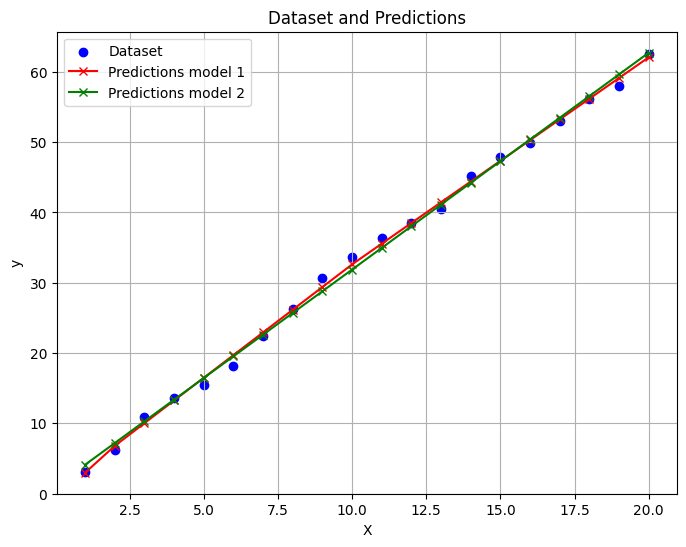

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Evaluate the trained model
with torch.no_grad():    
    predicted1 = model01(X)
    print("Predictions model1:")
    print(predicted1)

    predicted2 = model02(X)
    print("Predictions model2:")
    print(predicted2)

# Convert tensors to NumPy arrays for plotting
X = X.numpy()
y = y.numpy()
predicted1 = predicted1.numpy()
predicted2 = predicted2.numpy()

# Plot the dataset and predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Dataset', color='blue')
plt.plot(X, predicted1, label='Predictions model 1', color='red', marker='x')
plt.plot(X, predicted2, label='Predictions model 2', color='green', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Dataset and Predictions')
plt.grid(True)
plt.show()





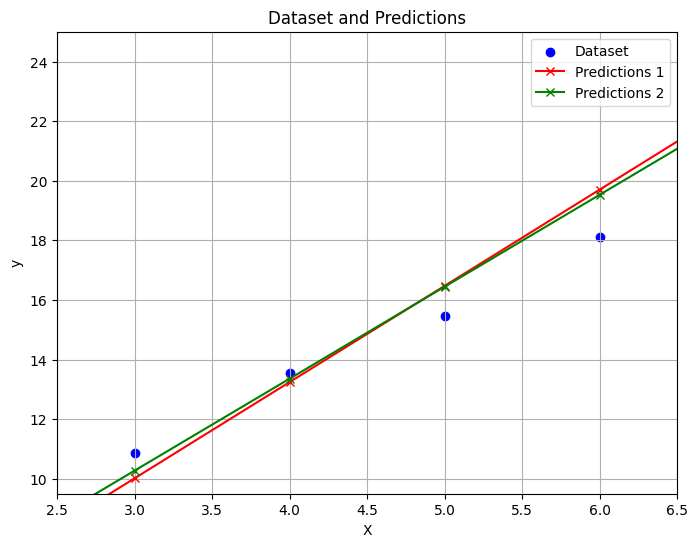

In [9]:
# zoom in on the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Dataset', color='blue')
plt.plot(X, predicted1, label='Predictions 1', color='red', marker='x')
plt.plot(X, predicted2, label='Predictions 2', color='green', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Dataset and Predictions')
plt.grid(True)
plt.xlim(2.5, 6.5)
plt.ylim(9.5, 25)
plt.show()

In [10]:
# get models prediction for x=5

x5=torch.tensor([5.0])

with torch.no_grad():    
    predicted1 = model01(x5)
    print("Model1 prediction for 5:")
    print(predicted1)

    predicted2 = model02(x5)
    print("Model2 prediction for 5:")
    print(predicted2)

Model1 prediction for 5:
tensor([16.4717])
Model2 prediction for 5:
tensor([16.4429])
